## 1. Theory

In [0]:
import numpy as np
from sklearn import preprocessing as pre

In [2]:
a = np.array([[-2, 1],
[-5, -4],
[-3, 1],
[0, 3],
[-8, 11],
[-2, 5],
[1, 0],
[5, -1],
[-1, -3],
[6, 1]])
a

array([[-2,  1],
       [-5, -4],
       [-3,  1],
       [ 0,  3],
       [-8, 11],
       [-2,  5],
       [ 1,  0],
       [ 5, -1],
       [-1, -3],
       [ 6,  1]])

In [3]:
x = [-2, -5, -3, 0, -8, -2, 1, 5, -1, 6]
y = [1, -4, 1, 3, 11, 5, 0, -1, -3, 1]
xs = pre.scale(x)
ys = pre.scale(y)
cov = np.cov(xs,ys)
cov

array([[ 1.11111111, -0.45362464],
       [-0.45362464,  1.11111111]])

In [4]:
W,V = np.linalg.eig(cov)
print(W)
print(V)

[1.56473576 0.65748647]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [5]:
xm = np.mean(a, axis=0)[0]
ym = np.mean(a, axis=0)[1]
ym

1.4

In [6]:
pre.scale(a)

array([[-0.27422981, -0.09865272],
       [-1.02212929, -1.33181178],
       [-0.52352964, -0.09865272],
       [ 0.22436984,  0.3946109 ],
       [-1.77002878,  2.36766539],
       [-0.27422981,  0.88787452],
       [ 0.47366967, -0.34528454],
       [ 1.47086898, -0.59191635],
       [-0.02492998, -1.08517997],
       [ 1.72016881, -0.09865272]])

# 2. **Dimensionality Reduction via PCA**

In [0]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

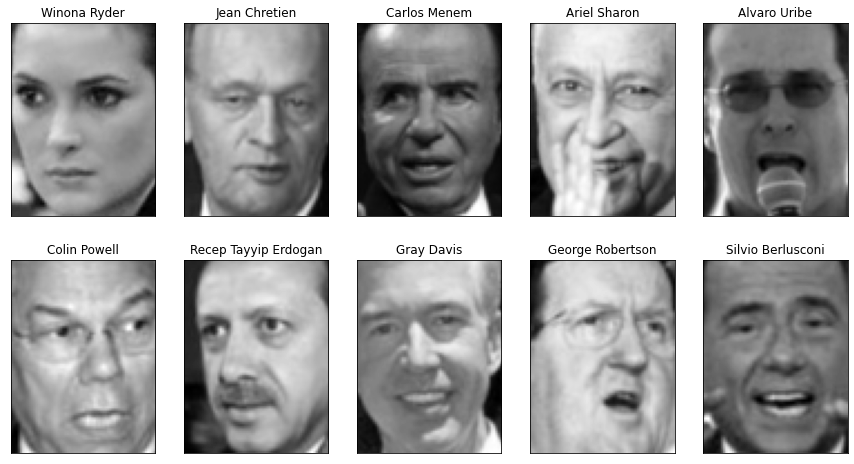

In [8]:
people = fetch_lfw_people( min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape
fig , axes = plt.subplots(2,5,figsize =(15 , 8 ) ,subplot_kw={'xticks' : ( ) , 'yticks' : ( ) } )
for target , image , ax in zip ( people.target , people.images , axes.ravel( )) :
  ax.imshow( image , cmap=cm.gray )
  ax.set_title( people.target_names[target] )

In [9]:
print (" people.images.shape: {}".format(people.images.shape) )
print ("Number of classes: {}".format(len(people.target_names) ) )

 people.images.shape: (3023, 87, 65)
Number of classes: 62


In [10]:
# count how often each target appears
counts = np.bincount(people.target)
# pr int count s next to t a r g e t names
for i , ( count , name ) in enumerate ( zip ( counts , people.target_names) ) :
  print ("{0:25} {1:3} ".format (name , count ) , end=' ' )
  if (i + 1)%3 == 0 :
    print ( )



Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [11]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
  mask [np.where(people.target==target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255


X_people

array([[0.22352941, 0.23660131, 0.30588236, ..., 0.06797386, 0.06535947,
        0.08888888],
       [0.2614379 , 0.31633985, 0.3477124 , ..., 0.03398693, 0.03267974,
        0.03660131],
       [0.07320261, 0.05620915, 0.05882353, ..., 0.08888888, 0.08888888,
        0.10065359],
       ...,
       [0.14248365, 0.0875817 , 0.10980392, ..., 0.05620915, 0.02614379,
        0.02091503],
       [0.21176471, 0.25620916, 0.22091503, ..., 0.82222223, 0.8235294 ,
        0.8326797 ],
       [0.43398693, 0.50326794, 0.5699346 , ..., 0.05490196, 0.05490196,
        0.05359477]], dtype=float32)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split the data into training and test sets

X_train , X_test,y_train , y_test = train_test_split(X_people , y_people , stratify=y_people , random_state=0)

# build a KNeighborsClassifiers using one neighbor

knn = KNeighborsClassifier( n_neighbors=1)
knn.fit( X_train , y_train)
print (" Testset set score of  knn : {:.2f} % ".format(knn.score(X_test,y_test)*100 ) )

 Testset set score of  knn : 23.26 % 


### 1. Write your own version of KNN (k=1) where you use the SSD (sum of squared dierences) to compute similarity

In [0]:
def knn_distances(xTrain,xTest,k):
    """
    Finds the k nearest neighbors of xTest in xTrain.
    """
    #the following formula calculates the Euclidean distances.

    import numpy as np
    
    distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]
    #because of float precision, some small numbers can become negatives. Need to be replace with 0.
    distances[distances < 0] = 0
    distances = distances**.5
    indices = np.argsort(distances, 0) #get indices of sorted items
    distances = np.sort(distances,0) #distances sorted in axis 0
    #returning the top-k closest distances.
    return indices[0:k,:], distances[0:k,:]


def knn_predictions(xTrain,yTrain,xTest,k=3):
    indices, distances = knn_distances(xTrain,xTest,k)
    yTrain = yTrain.flatten()
    rows, columns = indices.shape
    predictions = list()
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(yTrain[cell])
        predictions.append(max(temp,key=temp.count)) #this is the key function, brings the mode value
    predictions=np.array(predictions)
    return predictions

def knn_accuracy(yTest,predictions):
    x=yTest.flatten()==predictions.flatten()
    grade=np.mean(x)
    return np.round(grade*100,2)

In [14]:
predictions = knn_predictions(X_train, y_train, X_test,1)
print('Size of Predictions Array:\n', predictions.shape)

Size of Predictions Array:
 (516,)


In [15]:
print('Accuracy:',knn_accuracy(predictions,y_test),'%')

Accuracy: 23.26 %


### 2. Verify that your KNN has a similar accuracy as sklearn's version

In [16]:

print (" Testset set score of  sklearn knn : {:.2f} % ".format(knn.score(X_test,y_test)*100 ) )
print (" Testset set score of  my knn : {:.2f} %".format(knn_accuracy(predictions,y_test) ) )

 Testset set score of  sklearn knn : 23.26 % 
 Testset set score of  my knn : 23.26 %


### 3. Standardize your data (zero mean, divide by standard deviation)

In [0]:
def standardize_data(training_data):
    scaler = StandardScaler()
    scaler.fit(training_data)
    training_data = scaler.transform(training_data)
    #testing_data = scaler.transform(testing_data)
  
    return training_data

In [0]:
X_std = standardize_data(X_people)

In [19]:
X_std.shape

(2063, 5655)

### Function for Dimension Reduction using PCA

In [0]:


#Final function for pca dimension reduction

def pca_reduction(feature_data,n_dimensions):  #feature_data = standardized X_people
  
  #to get the covariance matrix
  X_features = feature_data.T  
  covariance_matrix = np.cov(X_features)
  #print(covariance_matrix)

  #eigen vectors and eigen values form covariance matrix


  eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

  #sorting eigen values to get the max values 

  eigen_vectors = eigen_vectors.T  #eigen_vectors are returned as columns, therefore we transpose
  
  idxs = np.argsort(eigen_values)[::-1]
  
  eigen_values = eigen_values[idxs]
  
  eigen_vectors = eigen_vectors[idxs]  
  

  # to store first n eigen_vectors

  p_components = eigen_vectors[0:n_dimensions]
  #print("p compo"  ,p_components.shape)

  reduced_data =   np.dot(feature_data, p_components.T)
    #transpose because now we need in column format 
  return reduced_data



### 4. Reducing data to 100D

In [0]:

X_100 = pca_reduction(X_std,100)

### 5. KNN with 100D data

In [0]:
X_train_100d , X_test_100d,y_train , y_test = train_test_split(X_100 , y_people , stratify=y_people , random_state=0)

In [23]:
predictions = knn_predictions(X_train_100d, y_train, X_test_100d,1)
print('Size of Predictions Array:\n', predictions.shape)

Size of Predictions Array:
 (516,)


In [24]:
print('Accuracy:',knn_accuracy(predictions,y_test),'%')

Accuracy: 25.78 %


### 6. KNN for 100D Whitened Data

In [25]:
X_100

array([[-22.49170097+0.j, -22.46073997+0.j,  -3.09214832+0.j, ...,
          1.20215266+0.j,  -0.23471669+0.j,  -1.59230717+0.j],
       [ -5.46343865+0.j, -39.97274171+0.j,  -9.76276534+0.j, ...,
          1.30607338+0.j,  -4.28421326+0.j,   0.89166196+0.j],
       [ 61.89857845+0.j,  19.20865297+0.j, -24.43572789+0.j, ...,
         -4.11876997+0.j,  -3.93785496+0.j,   0.9099669 +0.j],
       ...,
       [-41.43888973+0.j,  -6.51115663+0.j, -10.03103136+0.j, ...,
          0.36451398+0.j,   1.02791557+0.j,  -0.78836809+0.j],
       [-48.94551043+0.j,  70.1477367 +0.j,  21.27234482+0.j, ...,
         -5.00584683+0.j,   3.26728697+0.j,  -1.43954662+0.j],
       [-76.10940743+0.j, -37.86612626+0.j,   2.12466341+0.j, ...,
          3.58579653+0.j,  -2.87694254+0.j,  -0.47669279+0.j]])

In [0]:
def centered(X):
    newX = X - np.mean(X, axis = 0)
    return newX

In [27]:
X_100_std = centered(X_100)
X_100_std

array([[-22.49170097+0.j, -22.46073997+0.j,  -3.09214832+0.j, ...,
          1.20215267+0.j,  -0.23471667+0.j,  -1.59230716+0.j],
       [ -5.46343865+0.j, -39.97274171+0.j,  -9.76276534+0.j, ...,
          1.30607339+0.j,  -4.28421324+0.j,   0.89166197+0.j],
       [ 61.89857845+0.j,  19.20865297+0.j, -24.43572788+0.j, ...,
         -4.11876996+0.j,  -3.93785495+0.j,   0.9099669 +0.j],
       ...,
       [-41.43888973+0.j,  -6.51115662+0.j, -10.03103135+0.j, ...,
          0.36451399+0.j,   1.02791559+0.j,  -0.78836809+0.j],
       [-48.94551043+0.j,  70.1477367 +0.j,  21.27234483+0.j, ...,
         -5.00584682+0.j,   3.26728699+0.j,  -1.43954662+0.j],
       [-76.10940744+0.j, -37.86612626+0.j,   2.12466341+0.j, ...,
          3.58579654+0.j,  -2.87694252+0.j,  -0.47669279+0.j]])

In [0]:
#we need to apply the eigen_vectors to data and rescale th decorrelated data
def whitening(data):
    
  data_ = data.T
  cov = np.cov(data_)

  # Calculate the eigenvalues and eigenvectors of the covariance matrix

  eigen_values, eigen_vectors = np.linalg.eig(cov)

  # Apply the eigenvectors to data
  print("data shape",data.shape)
  print("eigen vector shape:", eigen_vectors.shape)

  #decorrelating the data
  decorrelated = np.dot(data,eigen_vectors)

  print('decorelated shape', decorrelated.shape)
  

  # Rescaling the decorrelated data
  whitened = decorrelated / np.sqrt(eigen_values + 1e-5)
  
  print('shape',whitened.shape)
  return whitened
  


In [29]:
X_whitened = whitening(X_100_std)

data shape (2063, 100)
eigen vector shape: (100, 100)
decorelated shape (2063, 100)
shape (2063, 100)


In [30]:

#to check if our data is whitened correctly or not, we check if the covarinace matrix for the data is a unity matrix or not

ACov = np.cov(X_whitened, rowvar=False, bias=True)

matrix = list(ACov)


# for diagnoals of equal width and height
def forward_diagonal(matrix):
    if not isinstance(matrix, list):
        raise TypeError("Must be of type list")

    results = []
    x = 0
    for k, row in enumerate(matrix):
        # next diag is (x + 1, y + 1)
        for i, elm in enumerate(row):

            if i == 0 and k == 0:
                results.append(elm)
                break
            if (x + 1 == i):
                results.append(elm)
                x = i
                break
    return results

print ('forward diagonals', forward_diagonal(matrix))


forward diagonals [(0.999515262402602+0j), (0.9995152529519084+0j), (0.9995152455090833+0j), (0.999515233130511+0j), (0.9995152011145886+0j), (0.9995151968210473+0j), (0.9995151832244292+0j), (0.999515170994165+0j), (0.9995151645679836+0j), (0.9995151458317152+0j), (0.9995151403170187+0j), (0.9995151364977516+0j), (0.9995151186230149+0j), (0.9995151126237213+0j), (0.9995150945574899+0j), (0.9995150720120471+0j), (0.999515055736756+0j), (0.999515046572575+0j), (0.9995150140600724+0j), (0.9995149963042529+0j), (0.9995149824551237+0j), (0.9995149680656673+0j), (0.9995149518431911+0j), (0.9995149347790004+0j), (0.9995149222155992+0j), (0.9995148837207777+0j), (0.9995148784441551+0j), (0.9995148589389264+0j), (0.9995148569027821+0j), (0.9995148422352883+0j), (0.9995148246577068+0j), (0.9995148151620267+0j), (0.9995148028247371+0j), (0.9995147787485372+0j), (0.9995147607476049+0j), (0.9995147507880999+0j), (0.9995147244806147+0j), (0.9995147130860185+0j), (0.9995146927690203+0j), (0.99951465

In [31]:
X_whitened.shape

(2063, 100)

In [0]:
X_train_whitened , X_test_whitened ,y_train , y_test = train_test_split(X_whitened , y_people , stratify=y_people , random_state=0)

In [33]:
predictions = knn_predictions(X_train_whitened, y_train, X_test_whitened,1)
print('Size of Predictions Array:\n', predictions.shape)

Size of Predictions Array:
 (516,)


In [34]:
print('Accuracy:',knn_accuracy(predictions,y_test),'%')

Accuracy: 35.47 %


### 7. Reducing data to 2D

In [0]:
X_2 = pca_reduction(X_std,2)

In [36]:
X_2.shape

(2063, 2)

In [37]:
y_people.shape

(2063,)

### 8. Plotting graph of Data

In [0]:
X= X_2.T

In [0]:
y_people = y_people.T

In [0]:
data = np.vstack((X,y_people)).T

In [41]:

import pandas as pd
import seaborn as sn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.DataFrame(data)

In [0]:
data.columns = ['PC1','PC2','Class']

In [44]:
data.head()

,PC1,PC2,Class
0,-22.491701+0.000000j,-22.460740+0.000000j,61.000000+0.000000j
1,-5.463439+0.000000j,-39.972742+0.000000j,25.000000+0.000000j
2,61.898578+0.000000j,19.208653+0.000000j,9.000000+0.000000j
3,-24.110639+0.000000j,-33.470870+0.000000j,5.000000+0.000000j
4,40.364565+0.000000j,-10.295024+0.000000j,1.000000+0.000000j


In [45]:
data = data.astype({'Class': int})

/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/cast.py:897: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [46]:
data.head()

,PC1,PC2,Class
0,-22.491701+0.000000j,-22.460740+0.000000j,61
1,-5.463439+0.000000j,-39.972742+0.000000j,25
2,61.898578+0.000000j,19.208653+0.000000j,9
3,-24.110639+0.000000j,-33.470870+0.000000j,5
4,40.364565+0.000000j,-10.295024+0.000000j,1


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


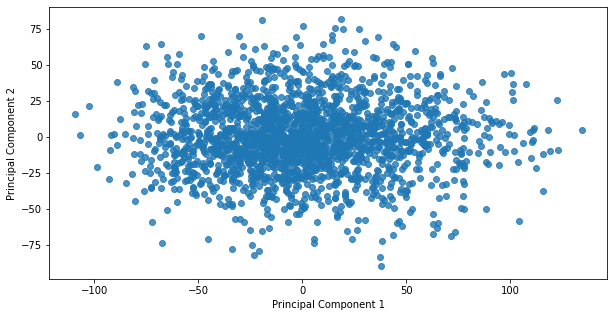

In [47]:
plt.figure(figsize = (10,5))
plt.scatter(data['PC1'], data['PC2'], alpha=0.8)



plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# 3. EigenFaces

### 1. Importing the data

(87, 65)


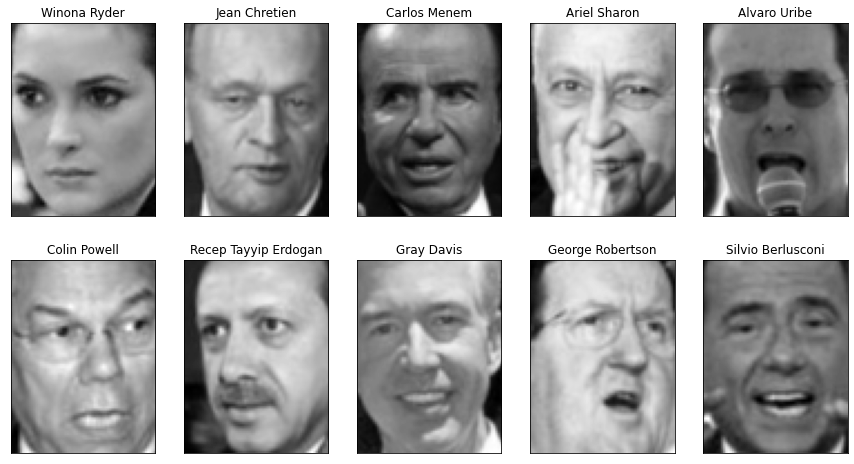

In [48]:
people = fetch_lfw_people( min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape
print(image_shape)
fig , axes = plt.subplots(2,5,figsize =(15 , 8 ) ,subplot_kw={'xticks' : ( ) , 'yticks' : ( ) } )
for target , image , ax in zip ( people.target , people.images , axes.ravel( )) :
  ax.imshow( image , cmap=cm.gray )
  ax.set_title( people.target_names[target] )

In [0]:
n_samples, h, w = people.images.shape

In [50]:
print (" people.images.shape: {}".format(people.images.shape) )
print ("Number of classes: {}".format(len(people.target_names) ) )

 people.images.shape: (3023, 87, 65)
Number of classes: 62


In [51]:
#count how often each target appears
counts = np.bincount(people.target)
# pr int count s next to t a r g e t names
for i , ( count , name ) in enumerate ( zip ( counts , people.target_names) ) :
  print ("{0:25} {1:3} ".format (name , count ) , end=' ' )
  if (i + 1)%3 == 0 :
    print ( )



Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [52]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
  mask [np.where(people.target==target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255


X_people

array([[0.22352941, 0.23660131, 0.30588236, ..., 0.06797386, 0.06535947,
        0.08888888],
       [0.2614379 , 0.31633985, 0.3477124 , ..., 0.03398693, 0.03267974,
        0.03660131],
       [0.07320261, 0.05620915, 0.05882353, ..., 0.08888888, 0.08888888,
        0.10065359],
       ...,
       [0.14248365, 0.0875817 , 0.10980392, ..., 0.05620915, 0.02614379,
        0.02091503],
       [0.21176471, 0.25620916, 0.22091503, ..., 0.82222223, 0.8235294 ,
        0.8326797 ],
       [0.43398693, 0.50326794, 0.5699346 , ..., 0.05490196, 0.05490196,
        0.05359477]], dtype=float32)

In [53]:
X_people.shape

(2063, 5655)

### 2. Standardize data

In [0]:
def standardize(data):
  mean = np.mean(data,axis = 0)
  centered_data = data - mean
  return centered_data

###3.5 Principal Eigen Face

In [0]:

"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(4 * n_col, 4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    plt.subplot(n_row, n_col, 0 + 1)
    plt.imshow(images[0].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[0])
    plt.xticks(())
    plt.yticks(())

In [0]:

#Applying PCA



def pca(X, n_dimensions):
    #n_samples, n_features = X.shape
    
    centered_data = standardize(X)
    U, S, V = np.linalg.svd(centered_data)     #S  : for singular values , V: eigen vectors

    pca_components = V[:n_dimensions]   #getting pca components with max eigen values

    reduced_dimension_data = U[:,:n_dimensions]*S[:n_dimensions]   
    
    return reduced_dimension_data, pca_components, U,S,V, centered_data


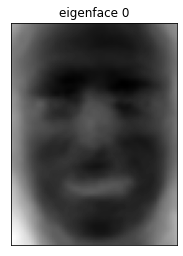

In [57]:
n_dimensions = 300
n_samples = 2063
h,w = 87,65
X = X_people    #p projected, c componenets, m mean y centered data
X_300, pca_components, U,S,V, centered_data= pca(X, n_dimensions)
eigenfaces = pca_components.reshape((n_dimensions, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 6, 6)





In [58]:
eigenfaces[0].shape

(87, 65)

### 3. PCA

In [0]:


#Final function for pca dimension reduction

def pca_reduction(feature_data,n_dimensions):  #feature_data = standardized X_people
  
  #to get the covariance matrix
  X_features = feature_data.T  
  covariance_matrix = np.cov(X_features)
  #print(covariance_matrix)

  #eigen vectors and eigen values form covariance matrix


  eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

  #sorting eigen values to get the max values 

  eigen_vectors = eigen_vectors.T  #eigen_vectors are returned as columns, therefore we transpose
  
  idxs = np.argsort(eigen_values)[::-1]  ##sorting eigen_values and reversing it to get in descending order
  
  eigen_values = eigen_values[idxs]
  
  eigen_vectors = eigen_vectors[idxs]  
  

  # to store first n eigen_vectors

  p_components = eigen_vectors[0:n_dimensions]
  #print("p compo"  ,p_components.shape)

  reduced_data =   np.dot(feature_data, p_components.T)
    #transpose because now we need in column format 
  return reduced_data



In [60]:
X_people.shape

(2063, 5655)

In [0]:
X = standardize(X_people)

In [62]:
X.shape

(2063, 5655)

In [63]:
centered_data.shape

(2063, 5655)

In [0]:
X_100 = pca_reduction(centered_data,100)

In [65]:
X_100.shape

(2063, 100)

In [0]:
X= X_100.T

In [67]:
X.shape


(100, 2063)

In [68]:
#becuase the complex part is zero we just take the real part

data = X
data

array([[  3.34577749+0.j,   0.86536321+0.j,  -9.41466425+0.j, ...,
          5.97267872+0.j,   7.42736067+0.j,  11.33529646+0.j],
       [  4.48123269+0.j,   5.16294114+0.j,  -4.02721571+0.j, ...,
          0.78781246+0.j, -12.40947561+0.j,   7.64959691+0.j],
       [  0.84137344+0.j,   0.1309155 +0.j,   2.3910049 +0.j, ...,
          0.05809014+0.j,  -4.05016545+0.j,  -0.699117  +0.j],
       ...,
       [  0.03671384+0.j,   0.38953219+0.j,  -0.61339059+0.j, ...,
         -0.15692298+0.j,  -0.10483141+0.j,  -0.02523823+0.j],
       [  0.02574651+0.j,  -0.16978676+0.j,   0.06224582+0.j, ...,
          0.32269627+0.j,   0.03687636+0.j,   0.2051951 +0.j],
       [ -0.1235661 +0.j,  -0.44220146+0.j,  -0.06700801+0.j, ...,
         -0.47817833+0.j,  -0.43648602+0.j,  -0.25740359+0.j]])

In [69]:

data.shape

(100, 2063)

In [0]:
data = np.real(data) #because complex part is zero we just get the real part

In [71]:
data

array([[  3.34577749,   0.86536321,  -9.41466425, ...,   5.97267872,
          7.42736067,  11.33529646],
       [  4.48123269,   5.16294114,  -4.02721571, ...,   0.78781246,
        -12.40947561,   7.64959691],
       [  0.84137344,   0.1309155 ,   2.3910049 , ...,   0.05809014,
         -4.05016545,  -0.699117  ],
       ...,
       [  0.03671384,   0.38953219,  -0.61339059, ...,  -0.15692298,
         -0.10483141,  -0.02523823],
       [  0.02574651,  -0.16978676,   0.06224582, ...,   0.32269627,
          0.03687636,   0.2051951 ],
       [ -0.1235661 ,  -0.44220146,  -0.06700801, ...,  -0.47817833,
         -0.43648602,  -0.25740359]])

In [0]:
y_people = y_people.T

In [0]:
y_people = np.real(y_people)

In [0]:
dataT = np.vstack((data,y_people)).T

In [0]:
import pandas as pd
import seaborn as sns

In [76]:

dataT = pd.DataFrame(dataT)
dataT.head


<bound method NDFrame.head of             0          1         2    ...       98        99    100
0      3.345777   4.481233  0.841373  ...  0.025747 -0.123566  61.0
1      0.865363   5.162941  0.130915  ... -0.169787 -0.442201  25.0
2     -9.414664  -4.027216  2.391005  ...  0.062246 -0.067008   9.0
3      3.374379   3.501049  1.008936  ... -0.456089 -0.512171   5.0
4     -5.970947   1.592313  2.303870  ... -0.643236  0.475567   1.0
...         ...        ...       ...  ...       ...       ...   ...
2058   2.366708   4.540611 -8.651616  ...  1.403332  0.548709  37.0
2059  -5.626691   4.522878 -5.106706  ... -0.387722 -0.294177  18.0
2060   5.972679   0.787812  0.058090  ...  0.322696 -0.478178   9.0
2061   7.427361 -12.409476 -4.050165  ...  0.036876 -0.436486  37.0
2062  11.335296   7.649597 -0.699117  ...  0.205195 -0.257404  22.0

[2063 rows x 101 columns]>

In [77]:
dataT.rename(columns = {0 : 'PC1',1 : 'PC2',2 : 'PC3'},inplace = True)
dataT.head

<bound method NDFrame.head of             PC1        PC2       PC3  ...        98        99   100
0      3.345777   4.481233  0.841373  ...  0.025747 -0.123566  61.0
1      0.865363   5.162941  0.130915  ... -0.169787 -0.442201  25.0
2     -9.414664  -4.027216  2.391005  ...  0.062246 -0.067008   9.0
3      3.374379   3.501049  1.008936  ... -0.456089 -0.512171   5.0
4     -5.970947   1.592313  2.303870  ... -0.643236  0.475567   1.0
...         ...        ...       ...  ...       ...       ...   ...
2058   2.366708   4.540611 -8.651616  ...  1.403332  0.548709  37.0
2059  -5.626691   4.522878 -5.106706  ... -0.387722 -0.294177  18.0
2060   5.972679   0.787812  0.058090  ...  0.322696 -0.478178   9.0
2061   7.427361 -12.409476 -4.050165  ...  0.036876 -0.436486  37.0
2062  11.335296   7.649597 -0.699117  ...  0.205195 -0.257404  22.0

[2063 rows x 101 columns]>

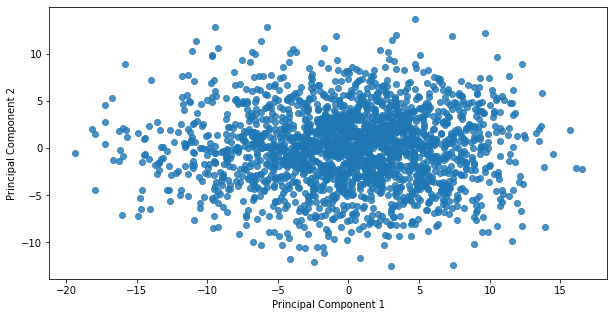

In [78]:
plt.figure(figsize = (10,5))
plt.scatter(dataT['PC1'], dataT['PC2'], alpha=0.8)



plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [79]:
#to calculate explained variance ratio --> so that we can tell which component is important:


X_100.shape

(2063, 100)

### Min and max of PC1

In [80]:
#index of image with max value in PC1
max_index = dataT[['PC1']].idxmax()
max_index

PC1    1425
dtype: int64

In [81]:
#index of image with min value in PC1
min_index = dataT[['PC1']].idxmin()
min_index

PC1    1105
dtype: int64

In [82]:
#max_image in PC1
max_image = np.array(dataT.iloc[1425,:100])
max_image.shape

(100,)

In [83]:
#min_image in PC1
min_image = np.array(dataT.iloc[1105,:100])
min_image

array([-1.93865787e+01, -5.20046318e-01, -1.53694629e-02, -3.58773347e+00,
       -1.29709656e+00, -3.89992577e+00, -2.28203307e+00, -2.06365436e+00,
        1.61861412e+00,  7.41783312e-01,  3.14278426e-01,  7.92475031e-01,
        8.45187300e-01,  5.77915375e-01, -4.02878309e-01,  5.03682604e-02,
        1.75346409e+00, -2.56884481e+00, -1.87844772e+00,  5.81985941e-01,
       -7.02796847e-02, -3.79687357e-01,  2.82487255e-01, -1.50237538e-01,
       -3.86482017e-01,  1.36795979e-01,  3.00379391e-01,  1.40178170e+00,
        9.44586129e-02, -1.24838976e+00, -9.32324035e-01, -1.37694688e+00,
       -3.23063196e-01,  2.42771559e-01, -7.87373806e-02,  4.13578717e-01,
        6.77635326e-02, -2.16819483e-01, -1.36508342e+00, -6.66293658e-01,
       -7.83532673e-01,  3.43749299e-01,  1.12739332e+00, -8.88209766e-01,
        7.42062266e-01,  2.82921173e-01, -8.01040874e-02, -1.62190188e-01,
       -1.63552736e-01,  6.49993912e-01,  1.01333301e+00, -3.93530853e-03,
        8.63988054e-01, -

In [84]:
#index of image with max value in PC2
max_index_pc2 = dataT[['PC2']].idxmax()
max_index_pc2


PC2    1903
dtype: int64

In [85]:
#max_image in PC2
max_image_pc2 = np.array(dataT.iloc[1903,:100])
max_image_pc2

array([ 4.71886453e+00,  1.36596778e+01, -1.64719622e+00, -4.59298926e+00,
       -3.62044148e-01,  1.44827550e+00,  6.99634316e-01,  7.25576018e-01,
        3.51062843e-01,  1.12503233e+00, -1.40059405e+00,  6.61788781e-02,
       -1.20526786e+00,  5.85603017e-01, -8.93341883e-01, -5.94508649e-01,
        3.80983336e-01, -1.47112878e+00, -1.22150388e-02,  1.29280821e+00,
       -3.05025381e-01,  2.42708187e+00,  3.78856273e-01,  3.36394886e-01,
       -1.17698884e+00, -2.06844079e+00, -6.40789011e-01,  6.66626647e-01,
        1.91006951e-03,  6.15612884e-01,  1.20100601e+00, -9.51913284e-01,
        7.03666167e-01,  2.12523890e+00,  3.06354959e-01, -3.32683143e-01,
       -2.74562760e-01, -2.69900933e-01, -1.48815238e-01, -5.57211324e-01,
       -4.15757272e-01, -2.87384623e-01,  1.53029699e-01,  1.10107587e-01,
       -6.93734962e-02,  4.41217789e-02,  9.24567197e-01,  8.24290722e-02,
       -6.38378088e-01,  9.63629387e-02, -7.57888650e-02, -3.84090972e-01,
        5.74244391e-01,  

In [86]:
#index of image with min value in PC2
min_index_pc2 = dataT[['PC2']].idxmin()
min_index_pc2

PC2    34
dtype: int64

In [87]:
#mix_image in PC2
mix_image_pc2 = np.array(dataT.iloc[34,:100])
mix_image_pc2

array([ 3.02426825e+00, -1.25388999e+01, -3.33363224e-01,  1.31577648e-01,
       -1.48641467e+00,  9.43573358e-01,  1.94896762e+00, -1.85669500e+00,
       -3.74665494e+00, -2.68354695e+00, -1.08732465e+00, -2.18284513e+00,
       -2.68599294e+00, -1.01106965e+00, -8.79115905e-01,  1.64299574e+00,
       -5.39978248e-01,  1.07404745e+00, -2.30266506e+00, -2.09716113e+00,
        2.07215189e+00, -5.15362147e-01,  9.75948153e-01,  1.13569823e+00,
        4.17786113e-01, -5.81391198e-01, -1.71473330e-02,  1.29922573e+00,
       -1.19118186e-02,  1.95682657e-01,  9.48285152e-01,  1.57598040e-01,
       -4.25526260e-01,  1.34221774e-01,  6.71134858e-01, -2.12030457e-01,
       -5.42073585e-01,  3.15669503e-01,  1.77987120e-01,  1.47605278e+00,
       -6.37491018e-01, -2.65010500e-01, -7.03479522e-01,  8.99077930e-01,
       -2.47410605e-01, -3.35358419e-02, -1.53631132e-01, -4.11884474e-01,
       -3.59614464e-01, -4.55748083e-01,  7.79431196e-01,  6.07078911e-01,
       -1.01777717e+00,  

In [0]:
#Applying PCA



def pca(X, n_dimensions):
    #n_samples, n_features = X.shape
    
    centered_data = standardize(X)
    U, S, V = np.linalg.svd(centered_data)     #S  : for singular values , V: eigen vectors

    pca_components = V[:n_dimensions]   #getting pca components with max eigen values

    reduced_dimension_data = U[:,:n_dimensions]*S[:n_dimensions]   
    
    return reduced_dimension_data, pca_components, U,S,V, centered_data
  



In [0]:
X_300, pca_components, U, S, V, centered_data = pca(X_people,300)

In [90]:
np.var(X_300[0])

0.42299402

In [91]:
centered_data.shape

(2063, 5655)

In [0]:
#explained_variance

def explained_variance(data,n_sample,n_dimensions): #data : centered data

  total_var = (data**2).sum()/(n_sample-1)   

  vs = []

  for i in range(n_dimensions):

    Xi = U[:,i].reshape(-1, 1)*S[i]@V[i].reshape(1, -1)

    var_i = (Xi**2).sum()/(n_sample-1)
    
    vs.append(var_i)

  explained_variance = np.array(vs).round(2)
  return explained_variance

In [93]:
explained_variance(centered_data,2063,300)

array([3.355e+01, 1.654e+01, 1.109e+01, 9.540e+00, 5.380e+00, 4.370e+00,
       3.400e+00, 2.760e+00, 2.570e+00, 2.320e+00, 2.280e+00, 1.950e+00,
       1.900e+00, 1.810e+00, 1.540e+00, 1.420e+00, 1.310e+00, 1.290e+00,
       1.190e+00, 1.020e+00, 9.700e-01, 9.000e-01, 8.600e-01, 8.100e-01,
       7.800e-01, 7.500e-01, 7.100e-01, 6.900e-01, 6.700e-01, 6.300e-01,
       6.000e-01, 5.800e-01, 5.600e-01, 5.400e-01, 5.300e-01, 5.100e-01,
       4.900e-01, 4.800e-01, 4.600e-01, 4.500e-01, 4.400e-01, 4.200e-01,
       4.100e-01, 4.000e-01, 3.900e-01, 3.700e-01, 3.700e-01, 3.600e-01,
       3.600e-01, 3.500e-01, 3.400e-01, 3.300e-01, 3.200e-01, 3.100e-01,
       3.100e-01, 3.000e-01, 2.900e-01, 2.800e-01, 2.800e-01, 2.700e-01,
       2.700e-01, 2.500e-01, 2.500e-01, 2.400e-01, 2.400e-01, 2.300e-01,
       2.300e-01, 2.300e-01, 2.200e-01, 2.100e-01, 2.100e-01, 2.100e-01,
       2.000e-01, 2.000e-01, 2.000e-01, 1.900e-01, 1.900e-01, 1.900e-01,
       1.900e-01, 1.800e-01, 1.800e-01, 1.800e-01, 

In [0]:
#Explained_variance_ratio
def explained_variance_ratio(data,n_sample,n_dimensions):

  total_var = (data**2).sum()/(n_sample-1)
  rs = []
  for i in range(n_dimensions):

    Xi = U[:,i].reshape(-1, 1)*S[i]@V[i].reshape(1, -1)
    var_i = (Xi**2).sum()/(n_sample-1)

    rs.append(var_i/total_var)

  explained_variance_ratio = np.array(rs).round(2)
  
  return explained_variance_ratio

In [95]:
explained_variance_ratio(centered_data,2063,300)

array([0.22, 0.11, 0.07, 0.06, 0.04, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [0]:
#cumalative explained_ratio
def cumalative_explained_ratio(data,n_dimensions):    
  k= n_dimensions
  total_sq = (data**2).sum()
  rs = []
  for i in range(1, k+1):
    Xi = U[:,:i]*S[:i]@V[:i]
    rs.append(((Xi**2).sum()/total_sq))

  cumalative_explained_ratio = np.array(rs).round(2)
  return cumalative_explained_ratio

In [97]:
cumalative_explained_ratio = cumalative_explained_ratio(centered_data,300)
cumalative_explained_ratio

array([0.22, 0.34, 0.41, 0.47, 0.51, 0.54, 0.56, 0.58, 0.6 , 0.61, 0.63,
       0.64, 0.65, 0.67, 0.68, 0.69, 0.69, 0.7 , 0.71, 0.72, 0.72, 0.73,
       0.74, 0.74, 0.75, 0.75, 0.76, 0.76, 0.77, 0.77, 0.77, 0.78, 0.78,
       0.78, 0.79, 0.79, 0.8 , 0.8 , 0.8 , 0.8 , 0.81, 0.81, 0.81, 0.82,
       0.82, 0.82, 0.82, 0.83, 0.83, 0.83, 0.83, 0.83, 0.84, 0.84, 0.84,
       0.84, 0.84, 0.85, 0.85, 0.85, 0.85, 0.85, 0.86, 0.86, 0.86, 0.86,
       0.86, 0.86, 0.86, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.88,
       0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.89, 0.89, 0.89, 0.89,
       0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ,
       0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.92, 0.92, 0.92,
       0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92,
       0.92, 0.92, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93,
       0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.

3.7 To get the number of components required to retain atleast 95% of the data

In [0]:
def to_get_k(cumalative_ratio):
  for k in range(0,cumalative_ratio.shape[0]):
    #print(cumalative_explained_ratio[i])
    if np.isclose(cumalative_ratio[k],0.95):
      print ( "The value of k is: ", k )
      break
  

In [99]:
to_get_k(cumalative_explained_ratio)

The value of k is:  178


In [0]:
#performing pca using k dim 
X_178, pca_components, U, S, V, centered_data = pca(X_people,178)

In [101]:
X_178.shape

(2063, 178)

### 6. Reconsctruction of X_train[0]  using primary  principal component

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,stratify=y_people , random_state=0)

In [0]:
n_dimensions = 178
n_samples = 2063
h,w = 87,65
X = X_people #p projected, c componenets, m mean y centered data
X_train_, pca_components, U,S,V, centered_data= pca(X, n_dimensions)

eigenfaces = pca_components.reshape((n_dimensions, h, w))


In [0]:
primary_principal_component = primary_eigen_face = eigenfaces[0]

In [105]:
avg_face = np.mean(X_people,axis = 0)
avg_face.shape
#X_train[0].shape

(5655,)

In [0]:
train_face = X_train[0,:].reshape(87,65)
avg_face = avg_face.reshape(87,65)

In [0]:
primary_eigen_face = primary_eigen_face.reshape(87,65)

In [0]:

train_FaceMS = train_face - avg_face

In [0]:
reconFace = avg_face + U[:87,:65]@ U[:87,:65].T @ train_FaceMS    #reconstructed face

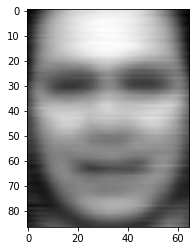

In [110]:
plt.imshow(reconFace, cmap='gray')

### 8. Reconstructed image using 178 eigenvectors 

In [0]:
def reconstruction(centered_data, pca_components, mean_of_data, h, w, image_index):

    n_samples, n_features = centered_data.shape

    weights = np.dot(centered_data, pca_components.T)  
    #print("weights shape",weights.shape)
    #print(weights)


    centered_vector = np.dot(weights[image_index, :], pca_components)
    #print("centered_vector.shape",centered_vector.shape)

    recovered_image=(mean_of_data + centered_vector).reshape(h, w)

    return recovered_image

In [0]:
mean = np.mean(X_train,axis = 0)   #mean of training data

n_dimensions = 178

X_train_, pca_components, U,S,V, centered_data= pca(X_train, n_dimensions)   #applying pca when k = 178 on the X_train

h= 87
w=65

image = reconstruction(centered_data,pca_components,mean,h,w,0)   #to get reconstructed image, image_index = 0 simce using the first image in X_train

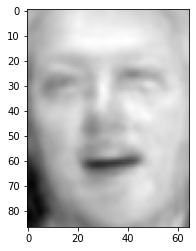

In [113]:
plt.imshow(image, cmap='gray')